In [66]:
import math
from pathlib import Path

from tools import read_json_file
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

IMGS_DIR = Path("/mnt/data/robot_imgs/")

In [3]:
data_files = list(IMGS_DIR.rglob("*.json"))

In [5]:
read_json_file(data_files[0])


{'blue_pts': [[462.97296142578125, 363.0684814453125],
  [345.896240234375, 289.5]],
 'red_pts': [[376.9765625, 357.0234375]],
 'robot': {'pos': {'x': 33.093409289909914, 'y': 120.08960203150218},
  'angle': 47.55111657877651,
  'dist': 9.008733123437189}}

In [108]:
def read_data_file(file_):
    data = read_json_file(file_)
    (side1_p, side2_p) = data["blue_pts"]
    tail_p = data["red_pts"][0]
    return file_, side1_p, side2_p, tail_p


df = pd.DataFrame(map(read_data_file, data_files), columns=["file", "S1", "S2", "T"])


def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))


def distances(s1, s2, t):
    s1s2 = distance(s1, s2)
    s1t = distance(s1, t)
    s2t = distance(s2, t)
    return s1s2, s1t, s2t


df[["S1S2", "S1T", "S2T"]] = df.apply(
    lambda row: distances(
        row['S1'], row['S2'], row['T']
    ),
    axis=1,
    result_type='expand',

)

filtered = pd.DataFrame()


def filter_samples(samples_):
    global filtered
    filtered = pd.concat([filtered, samples_]).drop_duplicates(subset='file')

    global df
    df = pd.concat([df, filtered]).drop_duplicates(subset='file', keep=False)


filter_samples(
    df[(df["S1S2"] == 0) | (df["S1T"] == 0) | (df["S2T"] == 0)])


def ratios(s1s2, s1t, s2t):
    return s1s2 / s1t, s1s2 / s2t, s1t / s2t


df[["S1S2/S1T", "S1S2/S2T", "S1T/S2T"]] = df.apply(
    lambda e: ratios(*e[["S1S2", "S1T", "S2T"]]),
    axis=1,
    result_type='expand',

)

print(df["S1S2/S1T"].describe())
print(df["S1S2/S2T"].describe())
print(df["S1T/S2T"].describe())
df

count    775.000000
mean       1.671041
std        1.059014
min        0.138458
25%        1.226792
50%        1.604082
75%        1.953052
max       22.444287
Name: S1S2/S1T, dtype: float64
count    775.000000
mean       1.633480
std        0.732637
min        0.135307
25%        1.250935
50%        1.637951
75%        1.943448
max       11.626378
Name: S1S2/S2T, dtype: float64
count    775.000000
mean       1.116559
std        0.657796
min        0.044325
25%        0.751013
50%        1.009882
75%        1.270417
max       12.096216
Name: S1T/S2T, dtype: float64


,file,S1,S2,T,S1S2,S1T,S2T,S1S2/S1T,S1S2/S2T,S1T/S2T
0,/mnt/data/robot_imgs/21_08_28/16_08_26.json,"[462.97296142578125, 363.0684814453125]","[345.896240234375, 289.5]","[376.9765625, 357.0234375]",138.272485,86.208603,74.333041,1.603929,1.860175,1.159762
1,/mnt/data/robot_imgs/21_08_28/14_14_37.json,"[393.9825744628906, 373.8843994140625]","[362.5, 259.4333190917969]","[333.0215148925781, 318.5238037109375]",118.702158,82.347109,66.035342,1.441485,1.797555,1.247016
2,/mnt/data/robot_imgs/21_08_28/16_05_57.json,"[463.0232238769531, 363.08489990234375]","[345.9119873046875, 289.5203552246094]","[376.976318359375, 356.976318359375]",138.299617,86.263461,74.265063,1.603224,1.862243,1.161562
3,/mnt/data/robot_imgs/21_08_28/14_13_27.json,"[392.5, 365.5430603027344]","[363.0234375, 257.9765625]","[335.04205322265625, 313.54205322265625]",111.532144,77.495293,62.213195,1.439212,1.792741,1.245641
4,/mnt/data/robot_imgs/21_08_28/14_13_53.json,"[394.57171630859375, 373.476806640625]","[363.06988525390625, 259.0]","[333.5150451660156, 318.3983154296875]",118.732071,82.228689,66.344920,1.443925,1.789618,1.239412
...,...,...,...,...,...,...,...,...,...,...
780,/mnt/data/robot_imgs/21_08_29/12_54_45.json,"[392.4668273925781, 240.37835693359375]","[303.92816162109375, 240.42189025878906]","[350.55511474609375, 256.93902587890625]",88.538676,45.064924,49.466034,1.964692,1.789888,0.911028
781,/mnt/data/robot_imgs/21_08_29/15_08_02.json,"[454.8617858886719, 73.76673889160156]","[575.8782958984375, 15.309304237365723]","[529.8854370117188, 74.5158920288086]",134.395935,75.027391,74.971749,1.791292,1.792621,1.000742
782,/mnt/data/robot_imgs/21_08_29/13_56_13.json,"[455.1545104980469, 336.4757080078125]","[406.15234375, 283.5555419921875]","[402.59808349609375, 313.0057067871094]",72.123202,57.558831,29.663866,1.253035,2.431349,1.940368
783,/mnt/data/robot_imgs/21_08_29/15_21_46.json,"[344.1546936035156, 247.44102478027344]","[411.548095703125, 239.9477081298828]","[381.0, 255.45260620117188]",67.808705,37.706260,34.257671,1.798341,1.979373,1.100666


In [114]:

from tools import draw_points


def show_img(file_: Path, pts):
    file_ = file_.parent / (file_.stem + ".jpg")
    img = plt.imread(file_)
    img = draw_points(img, pts)

    plt.imshow(img)
    plt.title(file_)
    plt.show()

def show_samples(samples_):
    for index, entry_ in samples_.sample(n=min(len(samples_), 10)).iterrows():
        show_img(entry_["file"], entry_[["S1", "S2", "T"]])

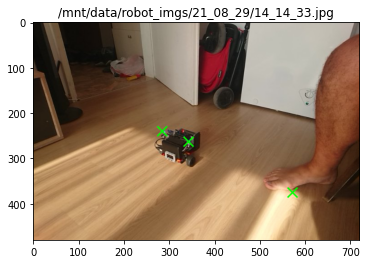

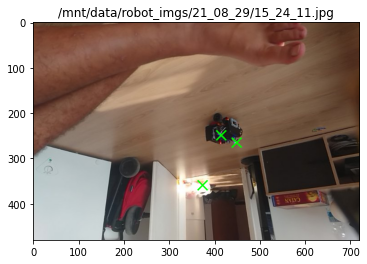

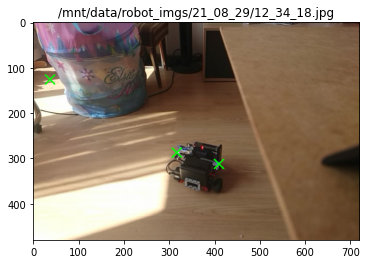

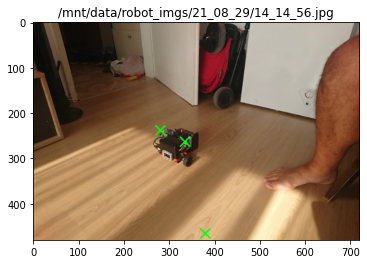

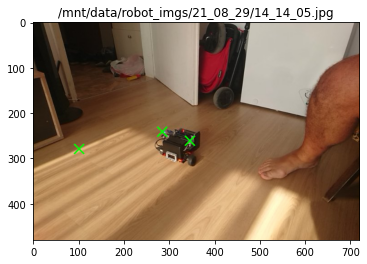

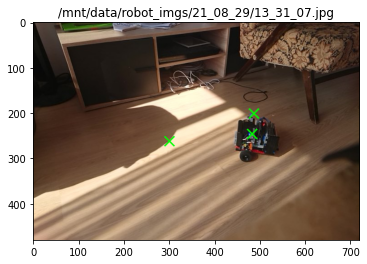

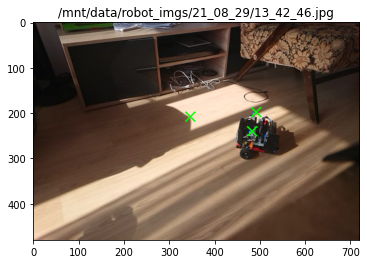

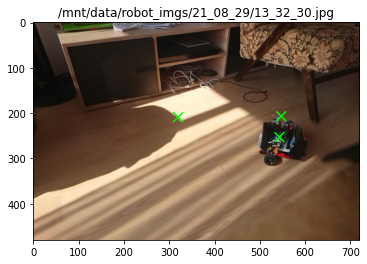

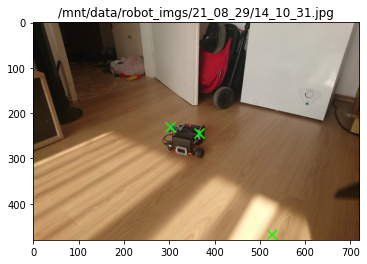

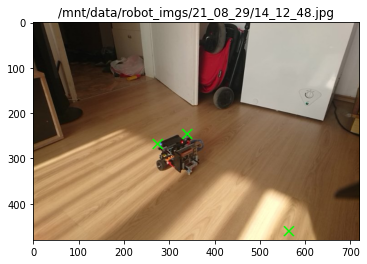

In [115]:
# samples = df[(np.abs(stats.zscore(df["S1S2/S1T"])) > 2.1)]
# samples = df[(np.abs(stats.zscore(df["S1S2/S2T"])) > 5.0)]
# samples = df[(np.abs(stats.zscore(df["S1T/S2T"])) > 5.0)]
samples = df[df.apply(lambda e: e["S1S2"] * 2 < e["S1T"] or e["S1S2"] * 3 < e["S2T"]
                      , axis=1)]
show_samples(samples)
